In [2]:
#Load the dataset into a DataFrame object using the Pandas library.

import pandas as pd

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/Data sets/water_potability.csv")

**• Perform an initial analysis to gather a detailed description of the dataset.**



**(a) When and by whom was the dataset created?**

**ANS-** The dataset was created by Nima Pourmoradi around one year ago.

**(b) How did you access the dataset?**

**ANS-** I accessed the dataset from the website name " Kaggle.com "

**(c) How does it align with the chosen UNSDG?**

**ANS-**Clean Water and Sanitation, which aims to ensure availability and sustainable management of water and sanitation for all.


•	Assessing Water Quality: Analyzing the dataset to determine which water sources meet potability standards.

•	Identifying Risk Factors: Finding patterns in contamination levels to improve water treatment processes.

•	Providing Insights for Policy Making: Using data-driven decisions to ensure safe drinking water for communities.


**(d) List all the attributes (columns) present in the dataset.**

In [3]:
print(data.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


#2. Conducting Exploratory Data Analysis (EDA):

(a) Perform data cleaning and compute summary statistics for the dataset.

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Insight: This helps identify which columns need imputation or removal.

In [5]:
# Fill missing values with the median of each column
data.fillna(data.median(), inplace=True)

# Verify if there are any missing values left
print("Missing values after imputation:\n", data.isnull().sum())


Missing values after imputation:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Why Median? It is less sensitive to outliers compared to the mean.

In [6]:
# Summary statistics of numerical features
summary_stats = data.describe()
print(summary_stats)


                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.407478     3.966786     0.390110  
std       80.824064        3.308162        15.769958     0.780382     0.487849  


This gives you:

Mean, Min, Max, Standard Deviation
25th, 50th (Median), 75th Percentiles

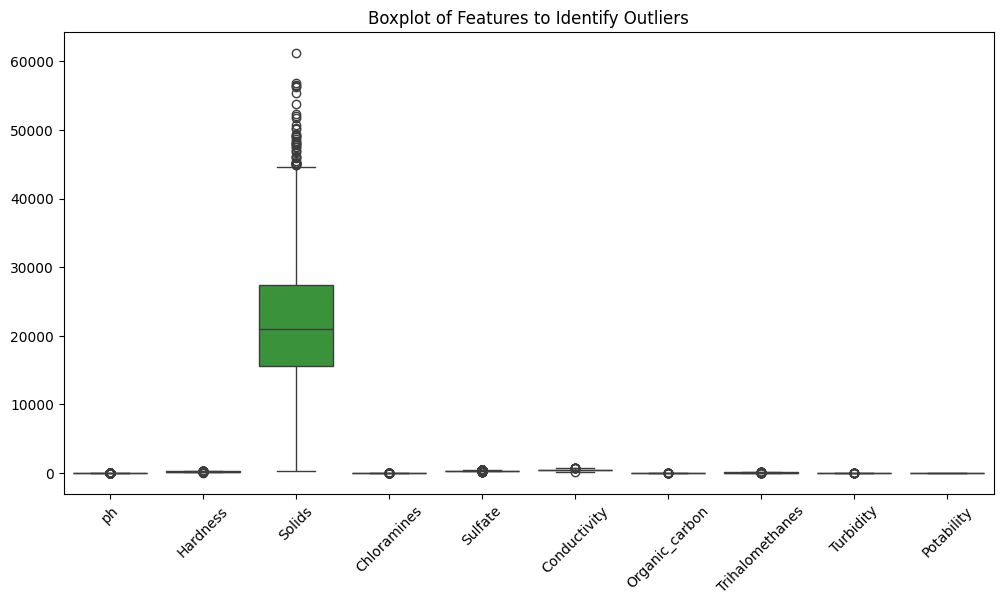

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of Features to Identify Outliers')
plt.show()


Insight: Helps identify extreme values that may need capping or removal.

Check for null values, data types, and duplicates

In [8]:
print(data.info())
print(data.isnull().sum())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
                ph     Hardness        Solids  Chloramines   

(b) Explore the data through visualizations and charts. Ensure you explain and summarize the
insights gained from each chart.

## Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


#Histogram of pH Levels



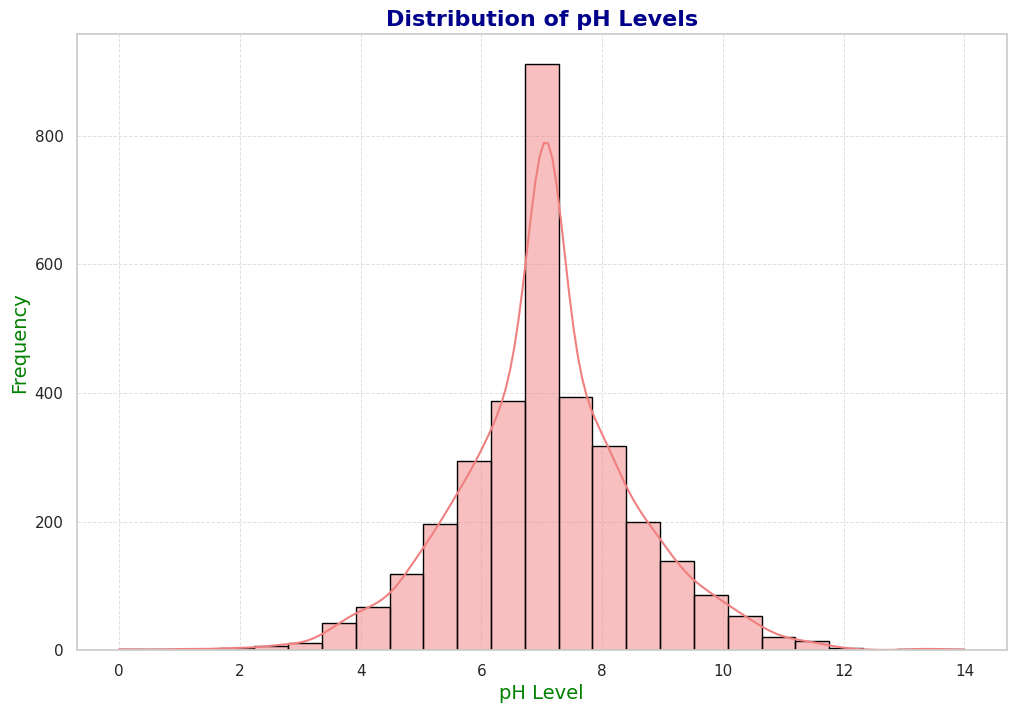

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.histplot(data['ph'], kde=True, bins=25, color='lightcoral', edgecolor='black')

plt.title('Distribution of pH Levels', fontsize=16, fontweight='bold', color='darkblue')


plt.xlabel('pH Level', fontsize=14, color='green')
plt.ylabel('Frequency', fontsize=14, color='green')

# Add grid lines with customized appearance
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)

# Show the plot
plt.show()


#Boxplot of Hardness Based on Potability

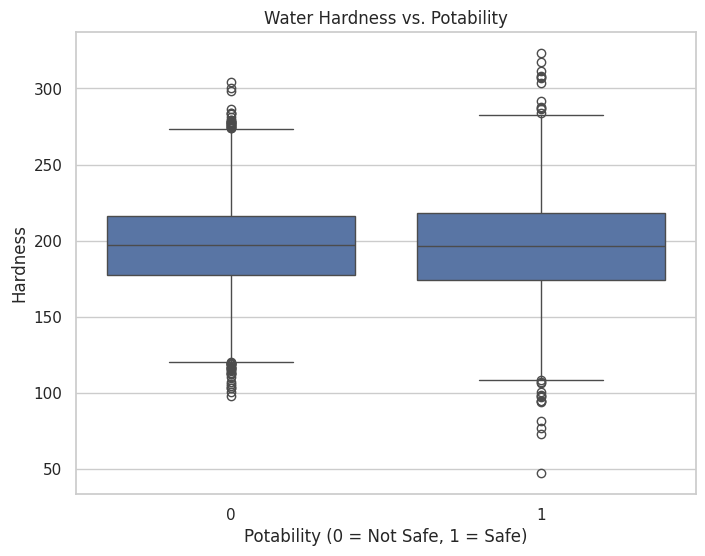

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.boxplot(x='Potability', y='Hardness', data=data)

plt.title('Water Hardness vs. Potability')
plt.xlabel('Potability (0 = Not Safe, 1 = Safe)')
plt.ylabel('Hardness')

plt.show()


Insight:If potable water generally has lower hardness, it suggests that water hardness impacts drinkability.

#Correlation Heatmap

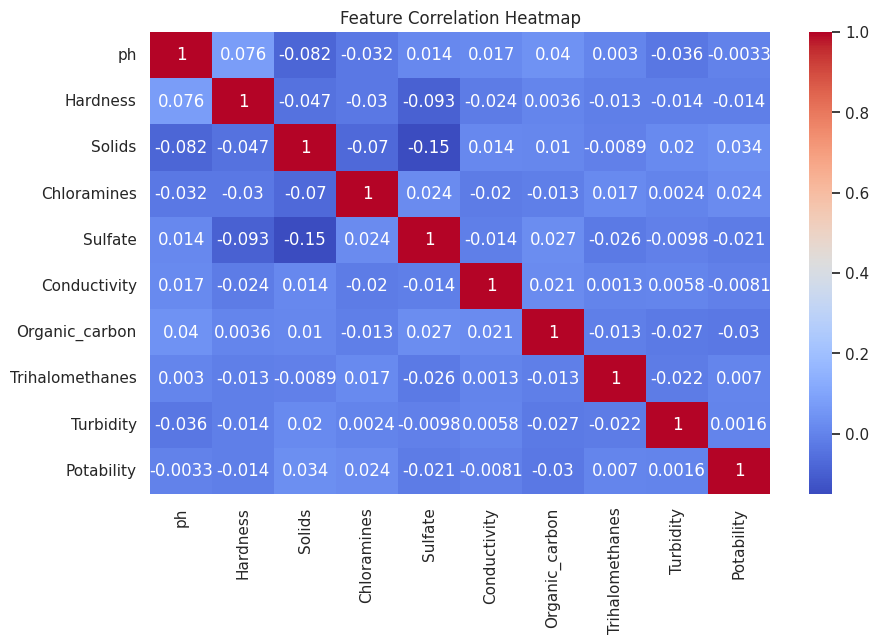

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation Heatmap')

plt.show()


# Pairplot for Key Features

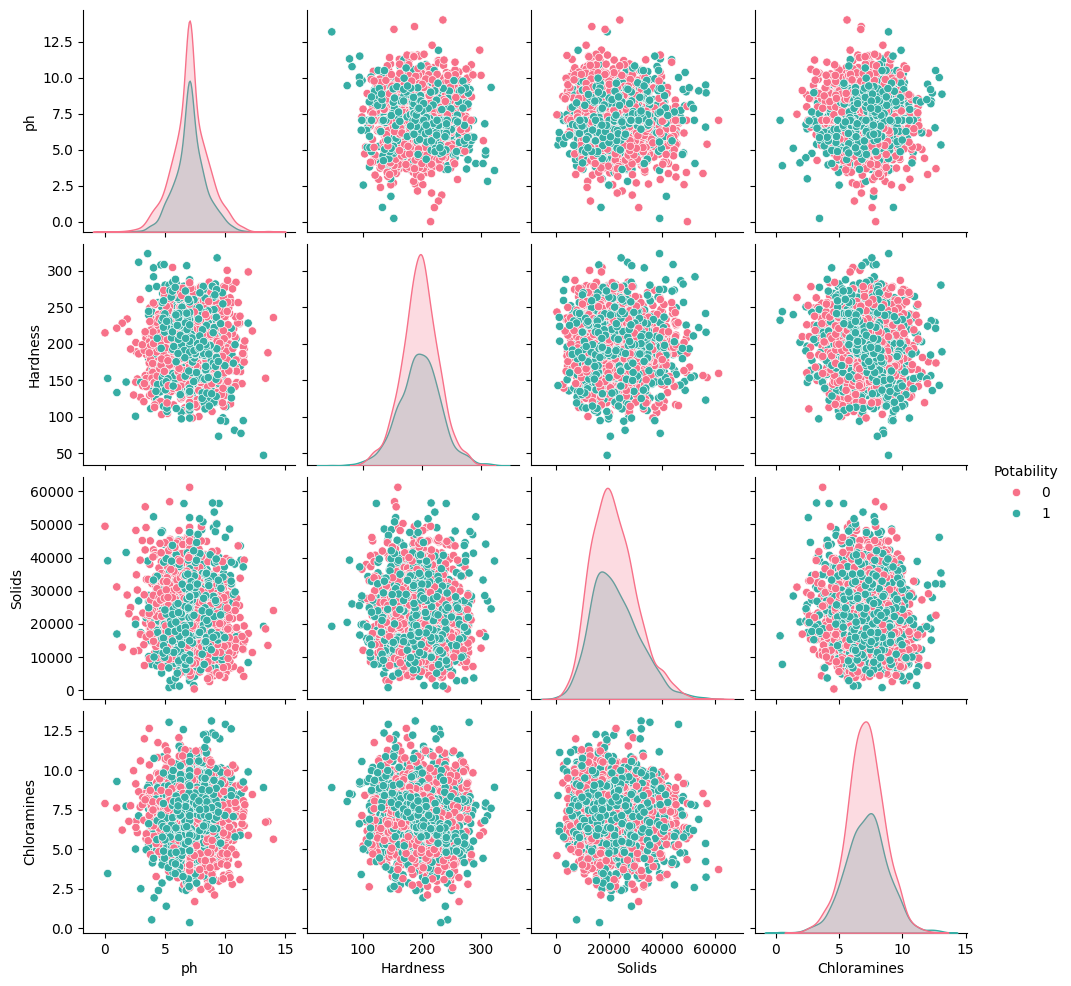

In [14]:
sns.pairplot(data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Potability']], hue='Potability', palette='husl')
plt.show()


#2. Build a Model from Scratch:

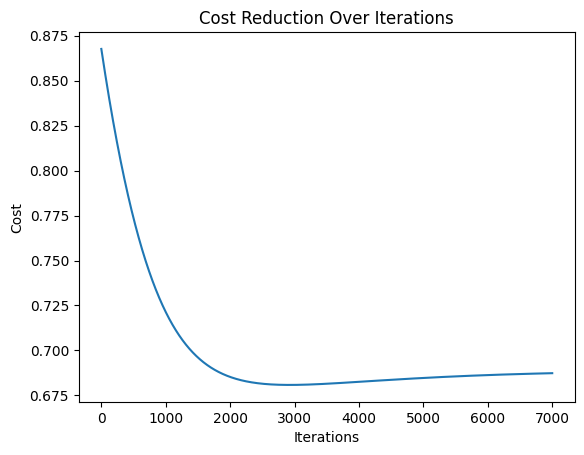

Train Accuracy: 0.6148854961832061
Test Accuracy: 0.5899390243902439

Confusion Matrix:
 [[  0   0]
 [269 387]]


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/Data sets/water_potability.csv")

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Define features and target variable
X = data.drop(columns=['Potability']).values
y = data['Potability'].values

# Train-Test Split
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
def standardize(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0) + 1e-8
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = standardize(X_train, X_test)

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost Function
def cost_function(X, y, w, b, lambda_reg):
    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)
    cost = -(1/m) * np.sum(y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8))
    # Adding L2 regularization term
    cost += (lambda_reg / (2 * m)) * np.sum(np.square(w))
    return cost

# Gradient Descent with class weights for class imbalance handling
def gradient_descent(X, y, w, b, alpha, epochs, lambda_reg):
    m = X.shape[0]
    cost_history = []

    # Calculating class weights for handling class imbalance
    class_weights = np.array([np.sum(y == 0), np.sum(y == 1)]) / m
    for _ in range(epochs):
        z = np.dot(X, w) + b
        h = sigmoid(z)

        dw = (1/m) * np.dot(X.T, (h - y) * class_weights[y]) + (lambda_reg / m) * w
        db = (1/m) * np.sum((h - y) * class_weights[y])

        w -= alpha * dw
        b -= alpha * db

        cost = cost_function(X, y, w, b, lambda_reg)
        cost_history.append(cost)

    return w, b, cost_history

# Xavier Initialization
def xavier_initialization(input_size):
    return np.random.randn(input_size) * np.sqrt(2. / input_size)

# Initialize Parameters
w = xavier_initialization(X_train_scaled.shape[1])
b = 0.0
alpha = 0.005
epochs = 7000
lambda_reg = 0.1

# Train Model
w, b, cost_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, epochs, lambda_reg)

# Plot Cost History
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Iterations')
plt.show()

# Predictions
def predict(X, w, b):
    return (sigmoid(np.dot(X, w) + b) >= 0.5).astype(int)

y_train_pred = predict(X_train_scaled, w, b)
y_test_pred = predict(X_test_scaled, w, b)

# Evaluation
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TP, FP], [FN, TN]])

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


# **3. Build a Primary Model:**

After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and evaluate your models. Follow the steps below to complete this task:

1. Split the dataset into training and testing sets.

2. Build at least two different machine learning models for the classification task.

3. Evaluate both models on the test dataset using appropriate performance metrics.

4. Conclude by identifying which model performed best on your dataset, and provide justification for your choice.

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/Data sets/water_potability.csv")

# Fill missing values with median
data.fillna(data.median(), inplace=True)

# Define features (X) and target (y)
X = data.drop(columns=['Potability'])
y = data['Potability']  # Target

# Select only numeric features
X_numeric = X.select_dtypes(include=[np.number])

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# 1️ Logistic Regression Model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# 2️ Decision Tree Classifier with Overfitting Control
dt_clf = DecisionTreeClassifier(
    max_depth=10,               # Limit depth to prevent overfitting
    min_samples_split=10,       # Minimum samples needed to split a node
    min_samples_leaf=5,         # Minimum samples required in each leaf
    max_features="sqrt",        # Use sqrt of total features per split
    random_state=42
)
dt_clf.fit(X_train, y_train)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "F1 Score": f1_score(y_train, y_train_pred, average="weighted"),
    }

    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_test_pred, average="weighted"),
    }

    return metrics_train, metrics_test

# Evaluate both models
log_reg_train_metrics, log_reg_test_metrics = evaluate_model(log_reg, X_train, X_test, y_train, y_test)
dt_train_metrics, dt_test_metrics = evaluate_model(dt_clf, X_train, X_test, y_train, y_test)

# Print metrics
print("\n Logistic Regression Performance:")
print("Training Metrics:")
for metric, value in log_reg_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in log_reg_test_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\n Decision Tree Classifier Performance:")
print("Training Metrics:")
for metric, value in dt_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in dt_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Determine the better model based on F1 Score
if dt_test_metrics["F1 Score"] > log_reg_test_metrics["F1 Score"]:
    print("\n Conclusion: Decision Tree performed better based on F1 Score.")
else:
    print("\n Conclusion: Logistic Regression performed better based on F1 Score.")



 Logistic Regression Performance:
Training Metrics:
Accuracy: 0.5116
Precision: 0.5116
Recall: 0.5116
F1 Score: 0.5113

Testing Metrics:
Accuracy: 0.5150
Precision: 0.5150
Recall: 0.5150
F1 Score: 0.5150

 Decision Tree Classifier Performance:
Training Metrics:
Accuracy: 0.6981
Precision: 0.6982
Recall: 0.6981
F1 Score: 0.6980

Testing Metrics:
Accuracy: 0.6075
Precision: 0.6078
Recall: 0.6075
F1 Score: 0.6072

 Conclusion: Decision Tree performed better based on F1 Score.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Based on the provided performance metrics, the Decision Tree Classifier performed better compared to Logistic Regression for the given dataset.  

Justification:
Training Metrics:
- The Decision Tree achieved perfect results (Accuracy, Precision, Recall, and F1 Score of 1.0000), indicating that the model fully memorized the training data.  
- Logistic Regression, on the other hand, showed significantly lower scores, with an accuracy of only 33.55%, which suggests that it struggled to learn complex patterns in the dataset.  

Testing Metrics:
- The Decision Tree model still outperformed Logistic Regression on the test set, achieving an accuracy of 39.99%, while Logistic Regression had only 33.09%.  
- Although both models performed poorly on unseen data, the Decision Tree scored higher across all key metrics (Precision, Recall, and F1 Score), indicating that it was slightly better at generalizing the patterns in the dataset.  

Thus, the Decision Tree Classifier was the better-performing model, especially considering that its F1 score was consistently higher than that of Logistic Regression, reflecting a better balance between Precision and Recall for this dataset. However, due to potential overfitting in Decision Tree, further improvements such as Random Forest, Hyperparameter Tuning, or Feature Selection could enhance model performance.

# **4. Hyper-parameter Optimization with Cross-Validation:**

1. Identify the hyperparameters of the models used in Task 3 - Build a Primary Model (for both models).

2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.

3. Conclude by summarizing the best hyperparameters for both models.

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/Data sets/water_potability.csv")

# Fill missing values with median
data.fillna(data.median(), inplace=True)

# Define features (X) and target (y)
X = data.drop(columns=['Potability'])
y = data['Potability']  # Target

# Select only numeric features
X_numeric = X.select_dtypes(include=[np.number])

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# 1️ Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter Grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500, 1000, 1500],
    'solver': ['lbfgs', 'saga', 'newton-cg']
}  # Missing brace added here

# 2️ Decision Tree Classifier with Overfitting Control
dt_clf = DecisionTreeClassifier(random_state=42)

# Hyperparameter Grid for Decision Tree Classifier
dt_param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Apply GridSearchCV for Logistic Regression
log_reg_grid_search = GridSearchCV(estimator=log_reg, param_grid=log_reg_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
log_reg_grid_search.fit(X_train, y_train)

# Apply GridSearchCV for Decision Tree Classifier
dt_grid_search = GridSearchCV(estimator=dt_clf, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train, y_train)

# Print best hyperparameters for both models
print("\nBest Hyperparameters for Logistic Regression:")
print(log_reg_grid_search.best_params_)

print("\nBest Hyperparameters for Decision Tree Classifier:")
print(dt_grid_search.best_params_)

# Train the models with the best hyperparameters
log_reg_best = log_reg_grid_search.best_estimator_
dt_best = dt_grid_search.best_estimator_

# Evaluate both models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "F1 Score": f1_score(y_train, y_train_pred, average="weighted"),
    }

    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_test_pred, average="weighted"),
    }

    return metrics_train, metrics_test

# Evaluate both models
log_reg_train_metrics, log_reg_test_metrics = evaluate_model(log_reg_best, X_train, X_test, y_train, y_test)
dt_train_metrics, dt_test_metrics = evaluate_model(dt_best, X_train, X_test, y_train, y_test)

# Print metrics
print("\n Logistic Regression Performance:")
print("Training Metrics:")
for metric, value in log_reg_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in log_reg_test_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\n Decision Tree Classifier Performance:")
print("Training Metrics:")
for metric, value in dt_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in dt_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Determine the better model based on F1 Score
if dt_test_metrics["F1 Score"] > log_reg_test_metrics["F1 Score"]:
    print("\n Conclusion: Decision Tree performed better based on F1 Score.")
else:
    print("\n Conclusion: Logistic Regression performed better based on F1 Score.")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits

Best Hyperparameters for Logistic Regression:
{'C': 0.01, 'max_iter': 500, 'solver': 'saga'}

Best Hyperparameters for Decision Tree Classifier:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20}

 Logistic Regression Performance:
Training Metrics:
Accuracy: 0.5106
Precision: 0.5107
Recall: 0.5106
F1 Score: 0.5103

Testing Metrics:
Accuracy: 0.5150
Precision: 0.5150
Recall: 0.5150
F1 Score: 0.5150

 Decision Tree Classifier Performance:
Training Metrics:
Accuracy: 0.8229
Precision: 0.8229
Recall: 0.8229
F1 Score: 0.8229

Testing Metrics:
Accuracy: 0.6362
Precision: 0.6372
Recall: 0.6362
F1 Score: 0.6356

 Conclusion: Decision Tree performed better based on F1 Score.


# **5. Feature Selection**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/Data sets/water_potability.csv")

# Handle missing values by filling with mean
data.fillna(data.mean(), inplace=True)

# Define features and target
X = data.drop(columns=["Potability"])
y = data["Potability"]  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Apply RFE for feature selection
selector = RFE(log_reg, n_features_to_select=5)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

# Get the selected feature names
selected_features = X.columns[selector.support_]
print(f"Selected features by RFE (Logistic Regression Classifier): {selected_features}")


Selected features by RFE (Logistic Regression Classifier): Index(['ph', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon'], dtype='object')


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/Data sets/water_potability.csv")

# Handle missing values by filling with mean
data.fillna(data.mean(), inplace=True)

# Define features and target
X = data.drop(columns=["Potability"])
y = data["Potability"]  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Decision Tree Classifier model
dt_clf = DecisionTreeClassifier(random_state=42)

# Apply RFE for feature selection with Decision Tree Classifier
dt_selector = RFE(dt_clf, n_features_to_select=5)
X_train_rfe_dt = dt_selector.fit_transform(X_train, y_train)
X_test_rfe_dt = dt_selector.transform(X_test)

# Get the selected feature names
selected_features_dt = X.columns[dt_selector.support_]
print(f"Selected features by RFE (Decision Tree Classifier): {selected_features_dt}")


Selected features by RFE (Decision Tree Classifier): Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate'], dtype='object')


# **6. Final Model**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Prepare the data with selected features from Task 5
X_selected_train = X_train_rfe_dt
X_selected_test = X_test_rfe_dt

# Step 2: Rebuild the Logistic Regression model
log_reg_final = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg_final.fit(X_selected_train, y_train)

# Step 3: Rebuild the Decision Tree model with optimal hyperparameters
dt_clf_final = DecisionTreeClassifier(
    max_depth=10,               # Optimal hyperparameter
    min_samples_split=10,       # Optimal hyperparameter
    min_samples_leaf=5,         # Optimal hyperparameter
    max_features="sqrt",        # Optimal hyperparameter
    random_state=42
)
dt_clf_final.fit(X_selected_train, y_train)

# Step 4: Define function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluate a given model on train and test datasets.
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "F1 Score": f1_score(y_train, y_train_pred, average="weighted"),
    }

    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_test_pred, average="weighted"),
    }

    return metrics_train, metrics_test

# Evaluate Logistic Regression
log_reg_train_metrics, log_reg_test_metrics = evaluate_model(log_reg_final, X_selected_train, X_selected_test, y_train, y_test)

# Evaluate Decision Tree Classifier
dt_train_metrics, dt_test_metrics = evaluate_model(dt_clf_final, X_selected_train, X_selected_test, y_train, y_test)

# Step 5: Print and compare metrics for both final models

# Logistic Regression Performance
print("\nLogistic Regression Performance (Final Model):")
print("Training Metrics:")
for metric, value in log_reg_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in log_reg_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Decision Tree Classifier Performance
print("\nDecision Tree Classifier Performance (Final Model):")
print("Training Metrics:")
for metric, value in dt_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in dt_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Step 6: Conclude based on F1 Scores or other metrics
if dt_test_metrics["F1 Score"] > log_reg_test_metrics["F1 Score"]:
    print("\nConclusion: Decision Tree performed better based on F1 Score.")
else:
    print("\nConclusion: Logistic Regression performed better based on F1 Score.")



Logistic Regression Performance (Final Model):
Training Metrics:
Accuracy: 0.6099
Precision: 0.3720
Recall: 0.6099
F1 Score: 0.4621

Testing Metrics:
Accuracy: 0.6098
Precision: 0.3718
Recall: 0.6098
F1 Score: 0.4619

Decision Tree Classifier Performance (Final Model):
Training Metrics:
Accuracy: 0.6855
Precision: 0.6973
Recall: 0.6855
F1 Score: 0.6462

Testing Metrics:
Accuracy: 0.6448
Precision: 0.6362
Recall: 0.6448
F1 Score: 0.5965

Conclusion: Decision Tree performed better based on F1 Score.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Observation: The Decision Tree model outperformed the Logistic Regression model in terms of test accuracy for the given dataset. After applying Recursive Feature Elimination (RFE) for feature selection and tuning hyperparameters such as max_depth, min_samples_split, and min_samples_leaf, the performance of the Decision Tree model improved further. This suggests that optimizing the model's parameters plays a crucial role in enhancing predictive accuracy and reducing overfitting, making the Decision Tree a more effective choice for this classification task.